# PP422 Class 12 - Overfitting and Bootstrap Example

In [1]:
# Loading packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Section 0 - Loading an Example Data Set

In [2]:
# Reading in data
boston = pd.read_csv('/Users/anialatrofa/Desktop/London School of Economics/Y1/AT/Study Material/PP422/Python/Data/Boston.csv', index_col=0)

In [3]:
# Initial Preview of the DataFrame
print(boston.info())
print(boston.head())

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 1 to 506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB
None
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.

In [4]:
# Examining the "medv" variable, which is the median value of owner-occupied homes in $1000s
# The original paper for this data was published in 1978
boston.medv.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [5]:
# Examing the "lstat" variable, which is a proportion of adults without some high school education or workers classified as laborers
boston.lstat.describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64

# Section 1 - Fitting a Regression Model

In this example, we will try to estimate the relationship between home values and the `lstat` variable.

## Using the statsmodel formula notation

Using the formula notation, we can pass a string of the model we would like our model to run. You can read the documentation for this function [here](https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html): 

In [6]:
# Fitting a model with basic formula notation
mod_formula = smf.ols('medv ~ lstat', boston).fit()

In [7]:
# Examining the output
print(mod_formula.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           5.08e-88
Time:                        09:21:57   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

## Using the statmodels API by providing the matrices or arrays of the data itself

An alternative syntax asks us to specify the matrices and array of the data we want to regress. In the statsmodels case, the documentation for this function is available [here](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html).

This syntax approach is very common in the machine learning literature. We will use the scikit-learn package to fit more technical machine learning models, which consistently use this approach, including that package's implementation of its [LinearRegression](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) function. 

In [8]:
# First we can save our relevant variables

# The target outcome variable 'y'
y = boston['medv']

# A matrix of control variables
X = boston['lstat']

We can then pass these data objects directly to our function to the OLS function.

In [9]:
# Fitting a model with the array syntax
mod_array = sm.OLS(y, X).fit()

In [10]:
# Examining this model
print(mod_array.summary())

                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              410.9
Date:                Fri, 14 Nov 2025   Prob (F-statistic):                    2.71e-67
Time:                        09:22:05   Log-Likelihood:                         -2182.4
No. Observations:                 506   AIC:                                      4367.
Df Residuals:                     505   BIC:                                      4371.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Comparing the Two Model Outputs

The above model did not exactly match our original model because it did __not__ have an intercept term, we only passed the array of the `lstat` variable. We can add an intercept term with the following code.

In [11]:
# save down our outcome variable
y = boston['medv']

# Separate our desired variable
X = boston['lstat']
# Append a column for the intercept term
X = sm.add_constant(X)

# Examining the new matrix X that we created for the data
X.head()

,const,lstat
1,1.0,4.98
2,1.0,9.14
3,1.0,4.03
4,1.0,2.94
5,1.0,5.33


In [12]:
# Fitting a model with this format
mod_array2 = sm.OLS(y, X).fit()
print(mod_array2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           5.08e-88
Time:                        09:22:13   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

## Generating Predictions from Our Model

First, as part of the process of fitting the regression, the model object will contain the _fitted values_ within the sample data. We can extract these with the `.fittedvalues` attribute.

In [13]:
# Getting fitted values within our model
mod_formula.fittedvalues

1      29.822595
2      25.870390
3      30.725142
4      31.760696
5      29.490078
         ...    
502    25.366864
503    25.927393
504    29.195563
505    28.397521
506    27.067452
Length: 506, dtype: float64

The above stored fitted values correspond to the $\hat{y}$ values within our regression itself. We can generate similar values by applying our model to new data.

The regression object we create has a `get_prediction()` method which will allow us to use our model to generate predictions given new data.

First, let's demonstrate this by passing the original data to this method to get predictions as if this were new data. These predictions should exactly match the above reported fitted values.

In [14]:
# Getting predicted values by first saving a prediction object where the original data set 'boston' is passed as the new data to predict on
mod_formula_predictions = mod_formula.get_prediction(boston)

# Examining the first 10 predictions from this prediction object
mod_formula_predictions.predicted[:5]

array([29.8225951 , 25.87038979, 30.72514198, 31.76069578, 29.49007782])

The point values are the same in the two approaches. We can then use these point estimates to calculate the MSE for our predictions.

In [15]:
# Calculating the MSE, using the mean function in the numpy package loaded as np

# First calculating the squared prediction error
print((mod_formula_predictions.predicted - boston.medv)**2)

# And then calculating the mean of these values:
np.mean((mod_formula_predictions.predicted - boston.medv)**2)

1       33.902614
2       18.236229
3       15.799496
4        2.687318
5       45.023056
          ...    
502      8.802280
503     28.381113
504     28.042982
505     40.928276
506    230.051599
Name: medv, Length: 506, dtype: float64


np.float64(38.48296722989415)

The `get_prediction()` method however is more powerful as it can be applied to new data as long as you specify all the variables estimated in the model. We can pass these values as a `dictionary` or `DataFrame` that maps the values to their appropriate variable.

In [16]:
# Using predictions on new data
mod_formula_predictions_new = mod_formula.get_prediction({'lstat': [5, 10, 15]})
mod_formula_predictions_new.predicted

array([29.80359411, 25.05334734, 20.30310057])

We can also obtain the confidence intervals for these predictions through the `conf_int()` method. The default for this method will produce 95% confidence intervals for the mean of the predicted values. The significance level can be changed with the `alpha` argument.

In [17]:
# Confidence intervals, default to 95%
mod_formula_predictions_new.conf_int()

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [18]:
# Confidence intervals, setting the alpha level to 0.10, corresponding to 90% confidence intervals
mod_formula_predictions_new.conf_int(alpha=0.1)

array([[29.13579406, 30.47139416],
       [24.56752885, 25.53916583],
       [19.82374292, 20.78245823]])

These confidence intervals are for the mean value we would expect for new observations with the given data input values you provide. Focusing on the mean, these confidence intervals largely reflect precision in our $\hat{\beta}$ estimates. However, they will not be accurate for __individual__ predicted values, as they are designed to cover the mean estimate. To obtain individual predictions, we can instead calculate __prediction intervals__ by including the `obs=True` argument in our call to `conf_int()`.

In [19]:
# Prediction intervals for a new observation
mod_formula_predictions_new.conf_int(obs=True)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

You will notice that the prediction intervals are much wider than the standard confidence intervals. This is because we are trying to predict individual observations, as opposed to the mean value, and thus need to adjust for more of the noise present in the data. The confidence intervals for the mean (when we did not include `obs=True`) __will not__ tend to contain the individual true values 95% of the time and will significantly undercover this measure because they are designed to predict the mean value. The prediction intervals calculated above try to contain the actual individual values 95% of the time and thus need to be wider (reflecting more uncertainty / noise) than predictions for the mean.

The general prediction syntax is the same if working with the model fit from the array approach, but we need to remember to add the intercept term.

In [20]:
# Creating a matrix with an intercept term for our new predictions
new_df = pd.DataFrame({'lstat': [5, 10, 15]})
new_df = sm.add_constant(new_df)
new_df.head()

,const,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [21]:
mod_array2_predictions = mod_array2.get_prediction(new_df)
mod_array2_predictions.conf_int(obs=True)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

### Testing the Coverage of Our Predictions in the Sample Data

If we try to test our sample coverage based only on these mean estimates, it will be quite low.

In [22]:
# Confidence interval for each value, based only on the mean
ci_lower = mod_formula.get_prediction(boston).conf_int()[:,0]
ci_upper = mod_formula.get_prediction(boston).conf_int()[:,1]
# Percentage of the values which actually lie in this range
np.mean((boston.medv >= ci_lower) & (boston.medv <= ci_upper))

np.float64(0.12055335968379446)

However, moving to the wider prediction interval will give us better coverage by incorporating additional noise.

In [23]:
# Confidence interval for each value, based on predicting observed values rather than the mean
model_predictions = mod_formula.get_prediction(boston).conf_int(obs=True)
ci_lower = model_predictions[:,0]
ci_upper = model_predictions[:,1]
# Percentage of the values which actually lie in this range
np.mean((boston.medv >= ci_lower) & (boston.medv <= ci_upper))

np.float64(0.9367588932806324)

# Section 2 - Random Noise and Prediction Errors

We can generate our own simulated data to test regressions with. Consider the following linear model setup:

$$Y_i = 3 + 2 X_i + \epsilon_i$$

Where $\epsilon_i \sim N(0, 3)$ is random noise following a normal distribution.

Using this data generating process, we can simulate this data and see how well a linear model may fit.

## Simulating Our Data

In [24]:
# Specifying parameters
n = 50
beta_0 =3
beta_1 = 2
sigma2_noise = 3

# Simulating a random variable for X
x = np.random.uniform(0, 10, size=n)

# Simulating random noise
noise = np.random.normal(loc=0, scale=np.sqrt(sigma2_noise), size = n)

# Creating our y values
y = beta_0 + beta_1 * x + noise

# Saving this as a data frame
data_sim = pd.DataFrame(
    {
        'x': x,
        'y': y
    }
)

We can quickly plot our data to see what it looks like.

<Axes: xlabel='x', ylabel='y'>

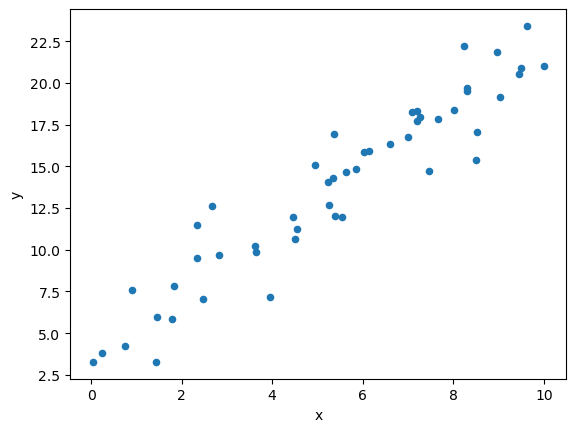

In [26]:
# Basic plot with pandas
data_sim.plot.scatter('x', 'y')

## Checking the Correlation Between X and the Random Noise

We can also check the correlation between our `x` variable and the random noise term. By construction, these values were simulated from independent processes, and therefore have a theoretical correlation of zero. However, the empirical correlation __in this sample__ may be different from zero.

The diagonal elements of the below output are the correlation of the variables with themselves (which will always be 1), and the off-diagonal elements of the matrix are the correlations between the two variables.

In [27]:
np.corrcoef(x, noise)

array([[ 1.       , -0.2606095],
       [-0.2606095,  1.       ]])

The `pearsonr` function from the scipy.stats module can test whether this correlation is significantly different from zero, which will report a p-value that we can interpret in the usual way against a null hypothesis of the correlation being equal to zero.

In [28]:
pearsonr(x, noise)

PearsonRResult(statistic=np.float64(-0.2606095023144952), pvalue=np.float64(0.0675635053265007))

We can also compare the correlation in different subsets of the data,

In [29]:
# Correlation in the first 25 observations
pearsonr(x[:25], noise[:25])

PearsonRResult(statistic=np.float64(-0.23669634159455089), pvalue=np.float64(0.2546313926582413))

In [30]:
# Correlation in the last 25 observations
pearsonr(x[-25:], noise[-25:])

PearsonRResult(statistic=np.float64(-0.35535030137823237), pvalue=np.float64(0.08129883186869162))

## Running a Regression Model

In [31]:
# And a basic linear regression
mod1 = smf.ols('y ~ x', data_sim).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     412.9
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           3.20e-25
Time:                        09:34:37   Log-Likelihood:                -98.336
No. Observations:                  50   AIC:                             200.7
Df Residuals:                      48   BIC:                             204.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8758      0.548      7.078      0.0

## Adding Irrelevant Variables

We could also apply these regressions to __irrelevant__ variables, which we will now generate.

In [32]:
# Adding new random and unrelated variables to our DataFrame
data_sim['w1'] = np.random.normal(size=n)
data_sim['w2'] = np.random.normal(size=n)
data_sim['w3'] = np.random.normal(size=n)
data_sim['w4'] = np.random.normal(size=n)

What happens if we add these variables to our above regression?

In [33]:
# Fitting the regression
mod2 = smf.ols('y ~ x + w1 + w2 + w3 + w4', data_sim).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     79.51
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           6.72e-21
Time:                        09:37:29   Log-Likelihood:                -97.232
No. Observations:                  50   AIC:                             206.5
Df Residuals:                      44   BIC:                             217.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7883      0.572      6.626      0.0

And what if we only had these 4 non-relevant variables to regress on?

In [34]:
mod3 = smf.ols('y ~ w1 + w2 + w3 + w4', data_sim).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.8990
Date:                Fri, 14 Nov 2025   Prob (F-statistic):              0.473
Time:                        09:39:40   Log-Likelihood:                -152.96
No. Observations:                  50   AIC:                             315.9
Df Residuals:                      45   BIC:                             325.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.3957      0.820     16.344      0.0

Pulling together all this functionality into a single cell, we can see how our estimates would vary across samples.

In [35]:
# Increasing the sample size to 500
n = 500
beta_0 =3
beta_1 = 2
sigma2_noise = 3

# Simulating a random variable for X
x = np.random.uniform(0, 10, size=n)

# Simulating random noise
noise = np.random.normal(loc=0, scale=np.sqrt(sigma2_noise), size = n)

# Creating our y values
y = beta_0 + beta_1 * x + noise

# Saving this as a data frame

data_sim = pd.DataFrame(
    {
        'x': x,
        'y': y
    }
)

# Adding irrelevant variables
data_sim['w1'] = np.random.normal(size=n)
data_sim['w2'] = np.random.normal(size=n)
data_sim['w3'] = np.random.normal(size=n)
data_sim['w4'] = np.random.normal(size=n)

In [36]:
# Fitting a regression model to a random sample of 50 observations
mod_sim = smf.ols('y ~ x + w1 + w2 + w3 + w4', data_sim.sample(n=50)).fit()
print(mod_sim.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     87.80
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           9.45e-22
Time:                        10:13:53   Log-Likelihood:                -92.040
No. Observations:                  50   AIC:                             196.1
Df Residuals:                      44   BIC:                             207.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8286      0.518      5.461      0.0

# Section 3 - Bootstrap Estimates

Now let's return to initial `boston` data and our first regression of `medv` on `lstat`. Recall the output from this regression and our $\hat{\beta}$ coefficient and the associated standard error.

In [37]:
print(mod_formula.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           5.08e-88
Time:                        10:14:21   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

An alternative way to estimate the standard error for the `lstat` coefficient in the above regression would be to conduct a __bootstrap__ analysis where we resample from our dataset and fit a regression multiple times. First, we can take a sample of our original DataFrame __with replacement__ by using the `.sample()` method with the following two arguments. By passing the argument

```python
n=boston.shape[0]
```
we ensure the size of our bootstrap sample equals the size of original DataFrame. Next the following additional argument ensures we are sampling _with replacement_.
```python
replace=True
```

In [38]:
boston.shape[0]

506

In [45]:
# Generating a single bootstrap sample
boston_bs = boston.sample(n=boston.shape[0], replace=True)

If we examine our new `boston_bs` data, we can see it has the same number of rows as our original data set.

In [46]:
boston_bs.shape[0]

506

However, if we examine the `index` values of this object, we will see we no longer have 506 unique rows, and some of the rows are duplicated within this new data.

In [47]:
# Calculating the unique rows in our new data set
boston_bs.index.nunique()

326

In [48]:
# Calculating the value counts of our index, some of the rows appear multiple times
boston_bs.index.value_counts()

203    4
273    4
436    4
147    4
339    4
      ..
17     1
265    1
65     1
218    1
149    1
Name: count, Length: 326, dtype: int64

We can fit a regression to this new data and see how our $\hat{\beta}$ coefficient compares to the original regression run on the full data set.

In [49]:
mod_bs = smf.ols('medv ~ lstat', boston_bs).fit()
print(mod_bs.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     572.6
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           4.20e-85
Time:                        10:17:22   Log-Likelihood:                -1673.7
No. Observations:                 506   AIC:                             3351.
Df Residuals:                     504   BIC:                             3360.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.7904      0.598     59.847      0.0

And if we needed to extract a specific coefficient estimate we can do so with the `params` attribute.

In [52]:
# Displaying all our coefficient estimates
print(mod_bs.params)
# Extracting the estimate for the lstat coefficient
print(mod_bs.params.iloc[1])

Intercept    35.790370
lstat        -1.019968
dtype: float64
-1.0199680230716104


This is our result from a single bootstrap, in practice we can replicate this process across many possible bootstrap samples. The following for-loop illustrates the process working from the code we wrote above.

In [53]:
# Saving down the number of bootstrap samples we would like to simulate
n_bs = 1000

# Creating a vector to store our estimates of the beta_1 coefficient
beta1_bs = np.zeros(n_bs)

# Running the bootstrap
for i in range(n_bs):
    # Generate a distinct bootstrap sample
    bs_loop = boston.sample(n=boston.shape[0], replace=True)
    
    # Fit the linear model with this new bs_loop data
    mod_loop = smf.ols('medv ~ lstat', bs_loop).fit()
    
    # Extract the coefficient estimate on the lstat variable and save this in our holder
    beta1_bs[i] = mod_loop.params.iloc[1]  

We now have 1000 bootstrap simulations for our regression coefficient and can examine summary statistics for this variable.

In [54]:
# Mean of our boostrap simulations
beta1_bs.mean()

np.float64(-0.9475741113692513)

In [55]:
# Difference between our bootstrap mean and the estimate from the full model
beta1_bs.mean() - mod_formula.params.iloc[1]

np.float64(0.002475242388738752)

And we can look at the quantiles of the data to see where most of the estimates are clustered.

In [56]:
# 2.5% and 97.5% quantiles from our simulated data
np.quantile(beta1_bs, q=[0.025, 0.975])

array([-1.04627335, -0.85395343])

These will be an alternative estimate to the confidence intervals calculated from asymptotic theory in the earlier regression. The above bootstrap confidence intervals are quite close to the output from the regression model.

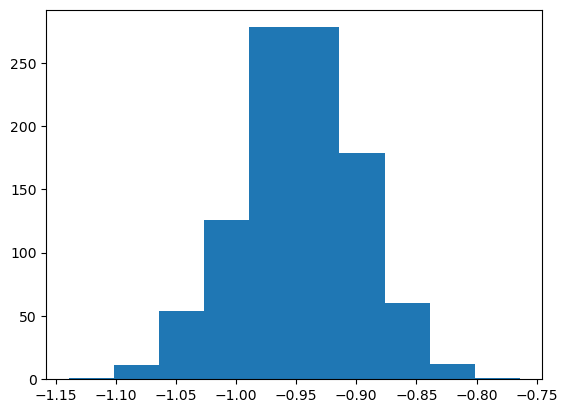

In [57]:
# Creating a basic histogram of our bootstrap estimates. 
plt.hist(beta1_bs);